## 24h ECG Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import sys, os
src_path = os.path.abspath("src")
sys.path.insert(0, src_path)


In [2]:
from data_preprocessing import load_mat_file, downsample_ecg
from visualization import plot_ecg_segment, plot_rr_24h
from config import file_path
from heart_rate_variability_analysis import extract_nn_intervals, compute_hrv


In [3]:
#-------------------
# Data Preprocessing
#-------------------

# segmnet the data into 'day' and 'sleep' segments from the .mat file
day_data, sleep_data = load_mat_file(file_path)

In [4]:
# Downsample both segments from 250 Hz to 100 Hz.
day_data_downsampled = downsample_ecg(day_data, original_rate=250, target_rate=100)
sleep_data_downsampled = downsample_ecg(sleep_data, original_rate=250, target_rate=100)

In [5]:
#  Print smple counts for verification.
print(f"Day segment: Original samples = {len(day_data)}, Downsampled samples = {len(day_data_downsampled)}")
print(f"Sleep segment: Original samples = {len(sleep_data)}, Downsampled samples = {len(sleep_data_downsampled)}")

Day segment: Original samples = 15108096, Downsampled samples = 6043238
Sleep segment: Original samples = 6600000, Downsampled samples = 2640000


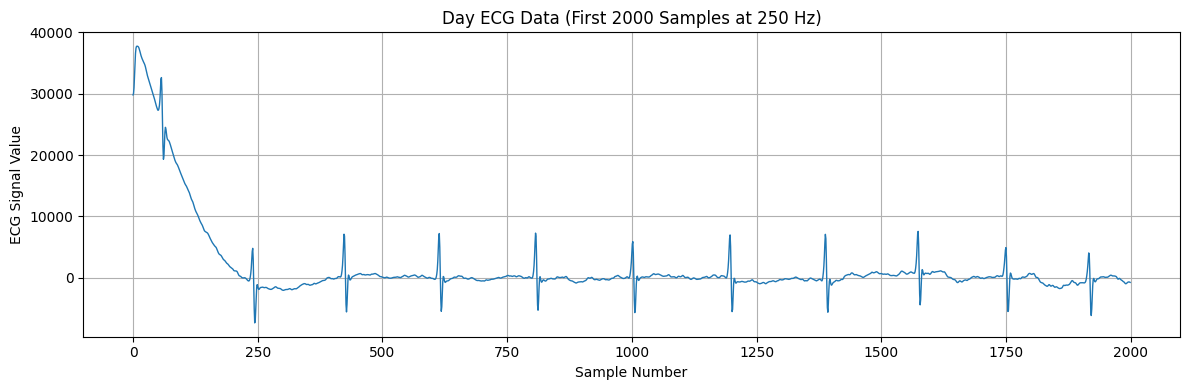

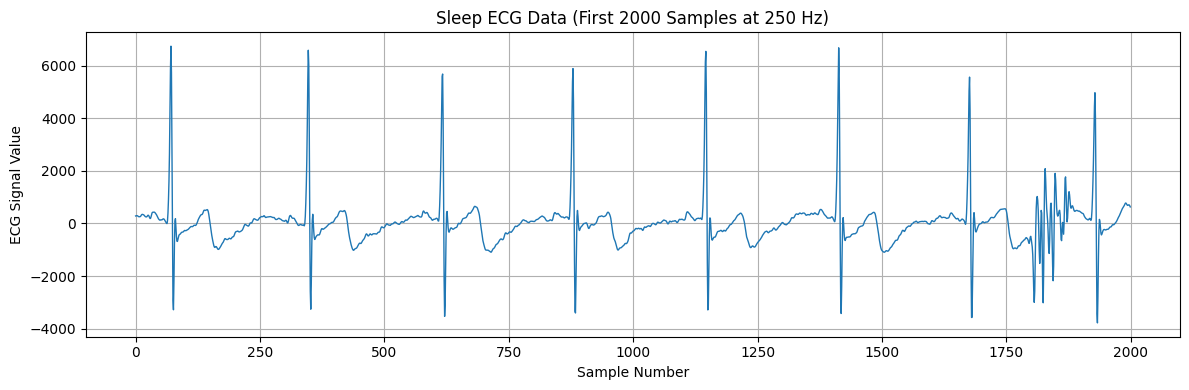

In [6]:
#---------------
# Visualization
#---------------

# Plotting the first 2000 samples of the original for both segments.
plot_ecg_segment(day_data, 250, num_samples=2000, label='Day')
plot_ecg_segment(sleep_data, 250, num_samples=2000, label='Sleep')

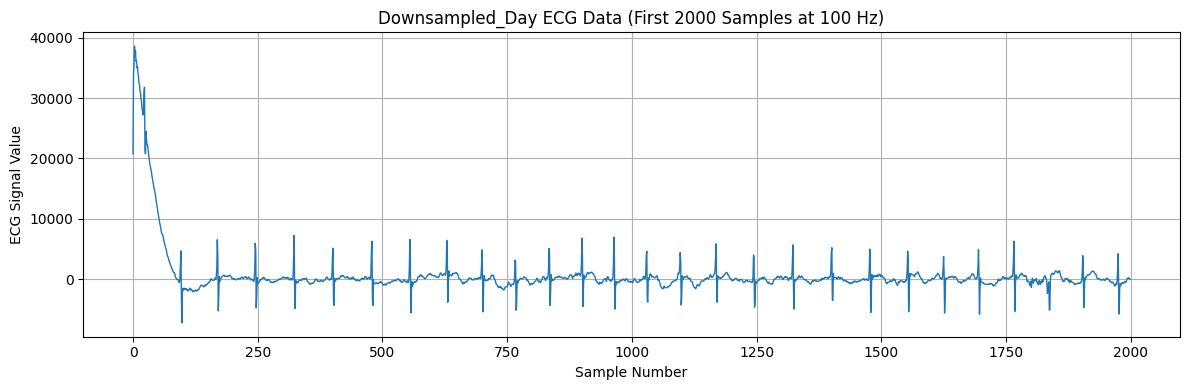

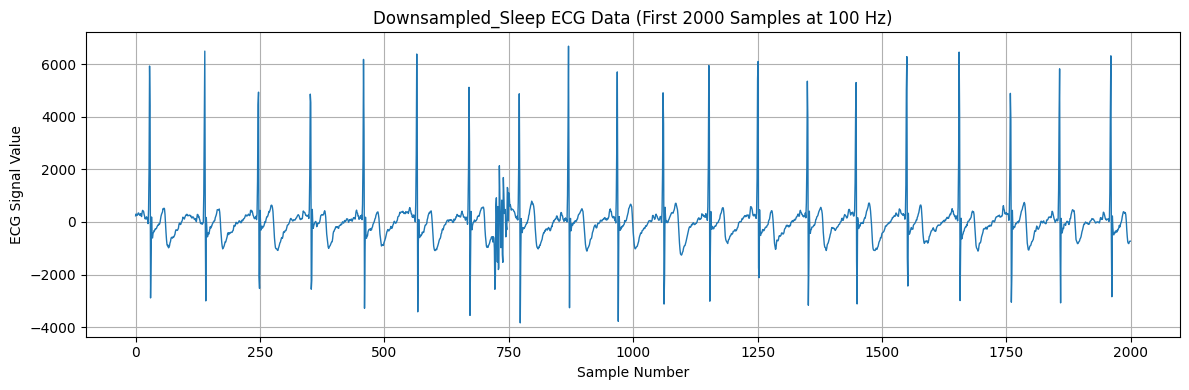

In [7]:
# Plotting the first 2000 samples of the downsampled for both segments.
plot_ecg_segment(day_data_downsampled, 100, num_samples=2000, label='Downsampled_Day')
plot_ecg_segment(sleep_data_downsampled, 100, num_samples=2000, label='Downsampled_Sleep')

In [8]:
#---------------------------
# Heart Variability Analysis
#---------------------------

#R-peak detection 
nn_day, nn_day_times = extract_nn_intervals(day_data_downsampled, sampling_rate=100, return_timestamps=True)
nn_night, nn_night_times = extract_nn_intervals(sleep_data_downsampled, sampling_rate=100, return_timestamps=True)


In [9]:
#compute HRV metrics
sdnn_day,   rmssd_day   = compute_hrv(nn_day)
sdnn_night, rmssd_night = compute_hrv(nn_night)

In [10]:
print("\nHRV Metrics:")
print(f"Day    - SDNN: {sdnn_day:.2f} ms | RMSSD: {rmssd_day:.2f} ms")
print(f"Night  - SDNN: {sdnn_night:.2f} ms | RMSSD: {rmssd_night:.2f} ms")



HRV Metrics:
Day    - SDNN: 131.99 ms | RMSSD: 68.23 ms
Night  - SDNN: 114.90 ms | RMSSD: 72.80 ms


In [11]:
# Print the results
results = pd.DataFrame({
    "SDNN_ms": [sdnn_day, sdnn_night],
    "RMSSD_ms": [rmssd_day, rmssd_night]
}, index=["Day", "Night"])

print("\nHRV Metrics:")
print(results)


HRV Metrics:
          SDNN_ms   RMSSD_ms
Day    131.985173  68.230331
Night  114.899091  72.801420


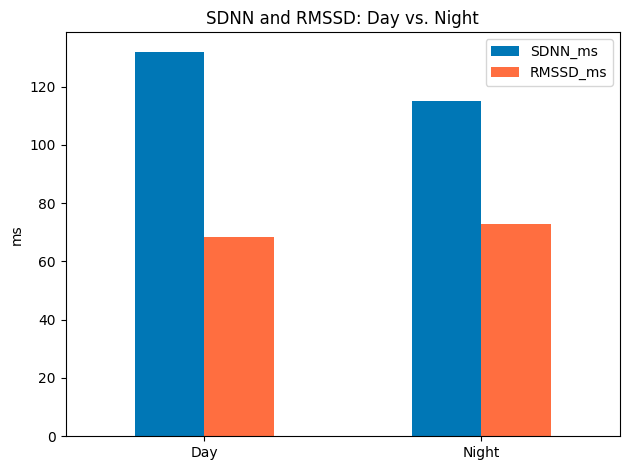

In [22]:

#plot comparison of HRV metrics
results.plot.bar(rot=0,  color=["#0077B6", "#FF6E40"])
plt.ylabel("ms")
plt.title("SDNN and RMSSD: Day vs. Night")
plt.tight_layout()
plt.show()


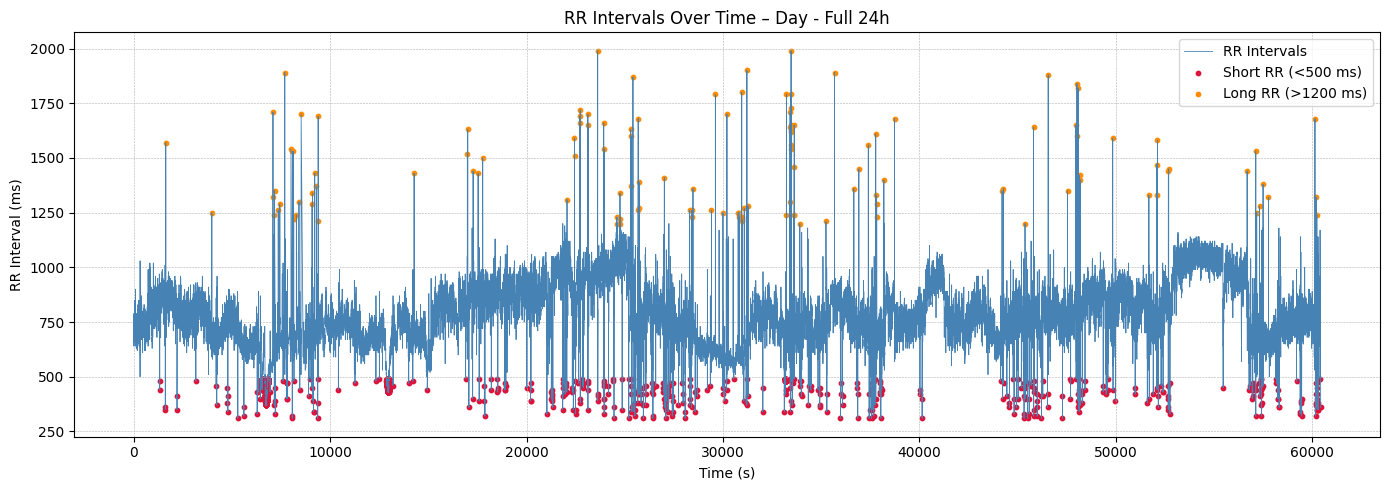

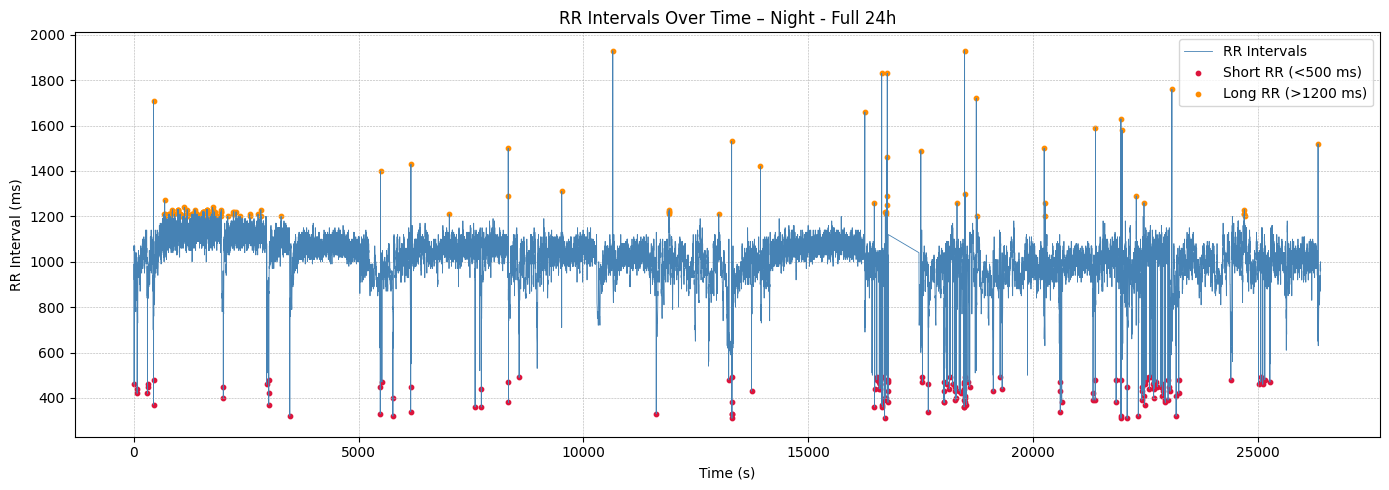

In [13]:
#-----------------------
# Arrhythmia Detection
#-----------------------

plot_rr_24h(nn_day_times, nn_day, label="Day - Full 24h")
plot_rr_24h(nn_night_times, nn_night, label="Night - Full 24h")

In [ ]:
#--------------------------------------------------------
# Exploring the Association Between HRV and Sleep Quality
#--------------------------------------------------------

# Load the PSQI data from an Excel file
sleep_df = pd.read_excel("objective-sleep-quality.xlsx")  

sleep_df.head()



,number,gender,age,height（cm）,weight（kg）,subjective sleep quality,sleep latency,sleep duration,habitual sleep efficiency,sleep disturbances,sleep medication,daytime dysfunction,PSQI score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20050628,male,48.0,170.0,79.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,20052606,male,38.0,173.0,90.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,5.0
3,20061729,male,41.0,185.0,76.6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
4,20092226,male,67.0,160.0,64.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0,8.0


In [31]:
# Drop the first row (index 0)
sleep_df = sleep_df.iloc[1:].reset_index(drop=True)

In [32]:
sleep_df.head()

,number,gender,age,height（cm）,weight（kg）,subjective sleep quality,sleep latency,sleep duration,habitual sleep efficiency,sleep disturbances,sleep medication,daytime dysfunction,PSQI score
0,20050628,male,48.0,170.0,79.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,20052606,male,38.0,173.0,90.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,5.0
2,20061729,male,41.0,185.0,76.6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
3,20092226,male,67.0,160.0,64.0,2.0,2.0,0.0,1.0,2.0,0.0,1.0,8.0
4,20092535,male,49.0,165.0,68.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,4.0


In [35]:
# extracting PSQI score for patient 19070921

psqi_score = sleep_df.loc[sleep_df["number"] == 19070921, "PSQI score"].values[0]
print(f"PSQI Score for patient 19070921: {psqi_score}")


PSQI Score for patient 19070921: 4.0


The subject’s PSQI score (4.0) indicates good subjective sleep quality, which aligns with nighttime HRV metrics. This supports healthy autonomic function and effective overnight recovery.